In [1]:
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import networkx as nx

In [2]:
df = pd.read_csv('DataFrame')
X = pd.read_csv('clean_data')

In [3]:
X.Age.describe()

count    6000.000000
mean       39.101000
std        15.172931
min         7.000000
25%        27.000000
50%        40.000000
75%        50.000000
max        85.000000
Name: Age, dtype: float64

In [4]:
df['Type of Travel'].value_counts(normalize=True)

Business travel    0.689167
Personal Travel    0.310833
Name: Type of Travel, dtype: float64

In [5]:
X.drop(columns=['Unnamed: 0'],inplace=True)
X

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,1,0,69,0,0,964,3,2,3,3,...,2,5,5,3,5,1,5,3,0,0
1,0,0,55,1,2,240,2,5,5,5,...,2,1,1,2,3,2,3,2,163,0
2,1,0,51,1,2,2672,5,5,5,5,...,1,4,4,4,4,5,4,3,0,1
3,0,1,27,1,0,495,2,3,2,2,...,3,3,4,4,3,4,2,3,0,0
4,0,0,12,0,0,462,2,4,2,3,...,2,2,3,4,2,2,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1,0,49,0,0,1587,3,4,3,4,...,5,4,4,3,5,3,4,5,35,0
5996,1,0,33,0,0,588,2,5,2,3,...,5,5,5,3,5,5,5,5,0,0
5997,0,0,50,0,0,2358,1,4,1,5,...,4,4,4,5,4,4,3,4,0,0
5998,0,0,35,0,0,672,2,3,2,2,...,5,5,1,1,4,4,1,5,0,0


In [6]:
X.describe()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,0.507667,0.180000,39.101000,0.689167,1.020833,1197.438167,2.703667,3.065167,2.737833,2.968333,...,3.448167,3.356833,3.374500,3.370167,3.631833,3.305833,3.638667,3.284500,14.808667,0.429500
std,0.499983,0.384219,15.172931,0.462873,0.962230,993.931490,1.346039,1.518762,1.402651,1.272635,...,1.330767,1.339578,1.294937,1.312160,1.181744,1.260779,1.172035,1.323197,37.784927,0.495046
min,0.000000,0.000000,7.000000,0.000000,0.000000,67.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,0.000000,0.000000,425.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,1.000000,0.000000,40.000000,1.000000,1.000000,861.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,1.000000,0.000000,50.000000,1.000000,2.000000,1732.250000,4.000000,4.000000,4.000000,4.000000,...,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,1.000000
max,1.000000,1.000000,85.000000,1.000000,2.000000,4963.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,595.000000,1.000000


In [7]:
A = np.loadtxt('adjacency_matrix.csv',delimiter=',')

In [8]:
np.diag(A).sum()

0.0

In [9]:
G = nx.from_numpy_matrix(A)

In [10]:
nx.is_connected(G)

True

In [11]:
features = pd.Series(X.satisfaction) 

In [12]:
pos = nx.spring_layout(G)

In [13]:
dissatisfied = df.index[df.satisfaction == 'neutral or dissatisfied'].tolist()
satisfied = df.index[df.satisfaction == 'satisfied'].tolist()

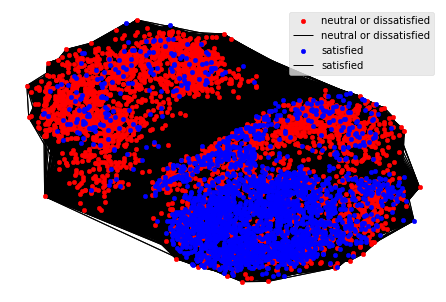

In [14]:
nx.draw(G,pos,nodelist=dissatisfied,node_size=20,node_color='r',label='neutral or dissatisfied')
nx.draw(G,pos,nodelist=satisfied,node_size=20,node_color='b',label='satisfied')
#plt.title('Network of Airline Passenger Survey')
plt.legend()
plt.show()

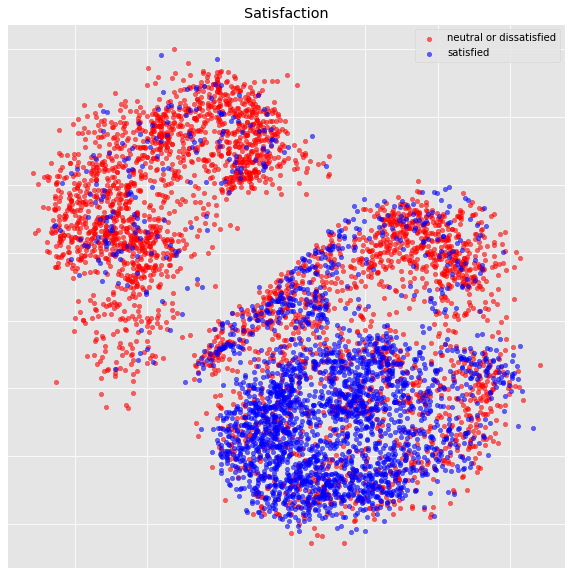

In [15]:
plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(G,pos,nodelist=dissatisfied,node_size=20,node_color='r', alpha=0.6,label='neutral or dissatisfied')
nx.draw_networkx_nodes(G,pos,nodelist=satisfied,node_size=20,node_color='b', alpha=0.6,label='satisfied')
plt.legend()
plt.title('Satisfaction')
plt.show()

<AxesSubplot:>

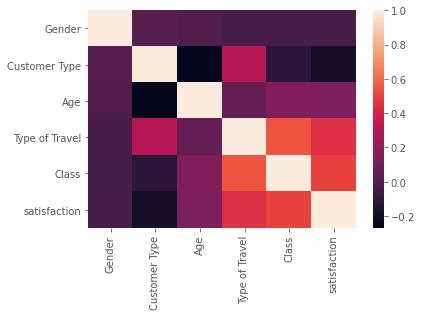

In [16]:
import seaborn as sns
cormap_vars = X[['Gender','Customer Type','Age','Type of Travel','Class','satisfaction']]
cormap = cormap_vars.corr()
sns.heatmap(cormap)

In [17]:
male = df.index[df.Gender == 'Male'].tolist()
female = df.index[df.Gender == 'Female'].tolist()

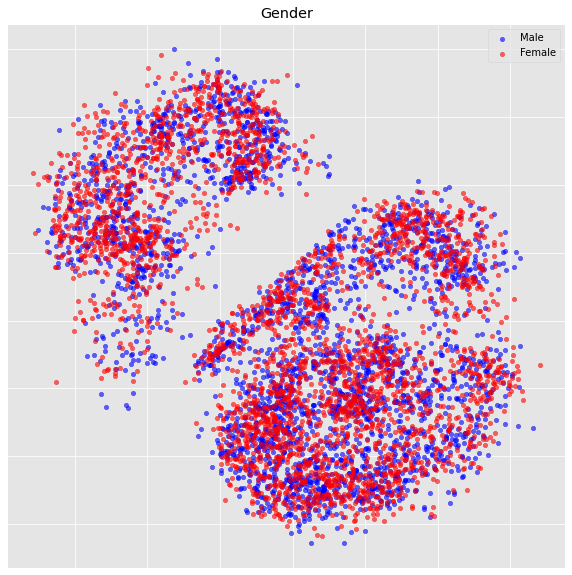

In [18]:
plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(G,pos,nodelist=male,node_size=20,node_color='b', alpha=0.6,label='Male')
nx.draw_networkx_nodes(G,pos,nodelist=female,node_size=20,node_color='r', alpha=0.6,label='Female')
plt.legend()
plt.title('Gender')
plt.show()

In [19]:
loyal = df.index[df['Customer Type'] == 'Loyal Customer'].tolist()
disloyal = df.index[df['Customer Type'] == 'disloyal Customer'].tolist()

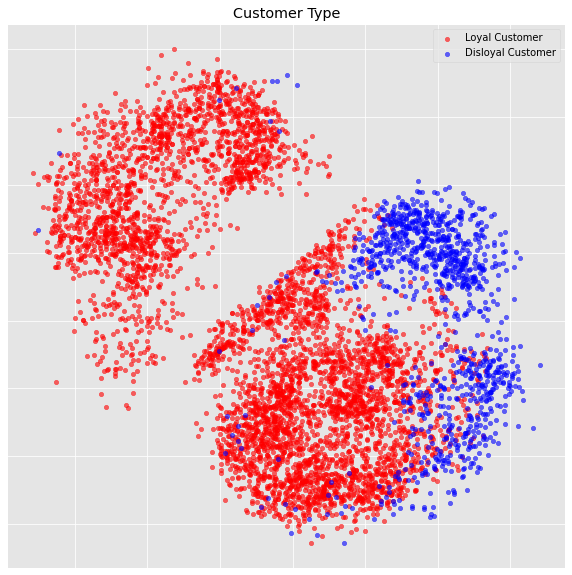

In [20]:
plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(G,pos,nodelist=loyal,node_size=20,node_color='r', alpha=0.6,label='Loyal Customer')
nx.draw_networkx_nodes(G,pos,nodelist=disloyal,node_size=20,node_color='b', alpha=0.6,label='Disloyal Customer')
plt.legend()
plt.title('Customer Type')
plt.show()

In [21]:
eco = df.index[df.Class == 'Eco'].tolist()
eco_plus = df.index[df.Class == 'Eco Plus'].tolist()
bus = df.index[df.Class == 'Business'].tolist()

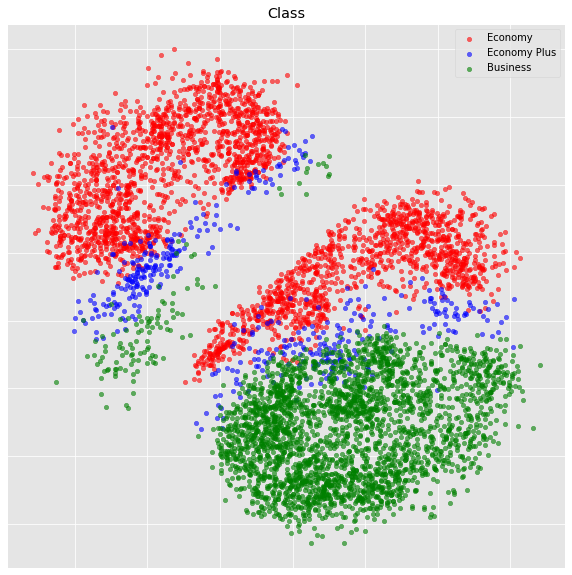

In [22]:
plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(G,pos,nodelist=eco,node_size=20,node_color='r', alpha=0.6,label='Economy')
nx.draw_networkx_nodes(G,pos,nodelist=eco_plus,node_size=20,node_color='b', alpha=0.6,label='Economy Plus')
nx.draw_networkx_nodes(G,pos,nodelist=bus,node_size=20,node_color='g', alpha=0.6,label='Business')
plt.legend()
plt.title('Class')
plt.show()

In [23]:
personal = df.index[df['Type of Travel'] == 'Personal Travel'].tolist()
business = df.index[df['Type of Travel'] == 'Business travel'].tolist()

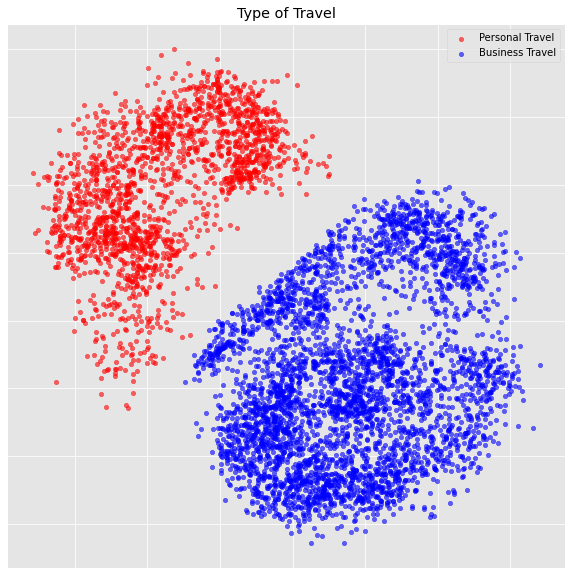

In [24]:
plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(G,pos,nodelist=personal,node_size=20,node_color='r', alpha=0.6,label='Personal Travel')
nx.draw_networkx_nodes(G,pos,nodelist=business,node_size=20,node_color='b', alpha=0.6,label = 'Business Travel')
plt.legend()
plt.title('Type of Travel')
plt.show()

In [25]:
AGE = df.Age.apply(lambda x: 0 if x < 26 else(1 if x < 39 else(2 if x < 50 else 3)))

In [26]:
age0 = AGE.index[AGE == 0].tolist()
age1 = AGE.index[AGE == 1].tolist()
age2 = AGE.index[AGE == 2].tolist()
age3 = AGE.index[AGE == 3].tolist()

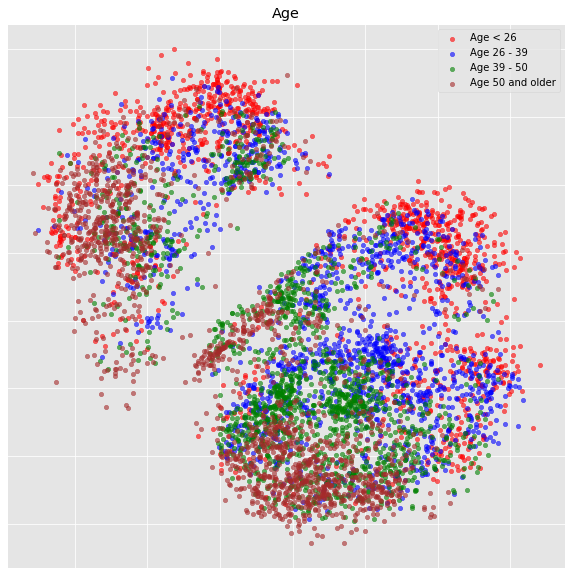

In [27]:
plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(G,pos,nodelist=age0,node_size=20,node_color='r', alpha=0.6,label = 'Age < 26')
nx.draw_networkx_nodes(G,pos,nodelist=age1,node_size=20,node_color='b', alpha=0.6,label = 'Age 26 - 39')
nx.draw_networkx_nodes(G,pos,nodelist=age2,node_size=20,node_color='g', alpha=0.6,label = 'Age 39 - 50')
nx.draw_networkx_nodes(G,pos,nodelist=age3,node_size=20,node_color='brown', alpha=0.6,label = 'Age 50 and older' )
plt.legend()
plt.title('Age')
plt.show()

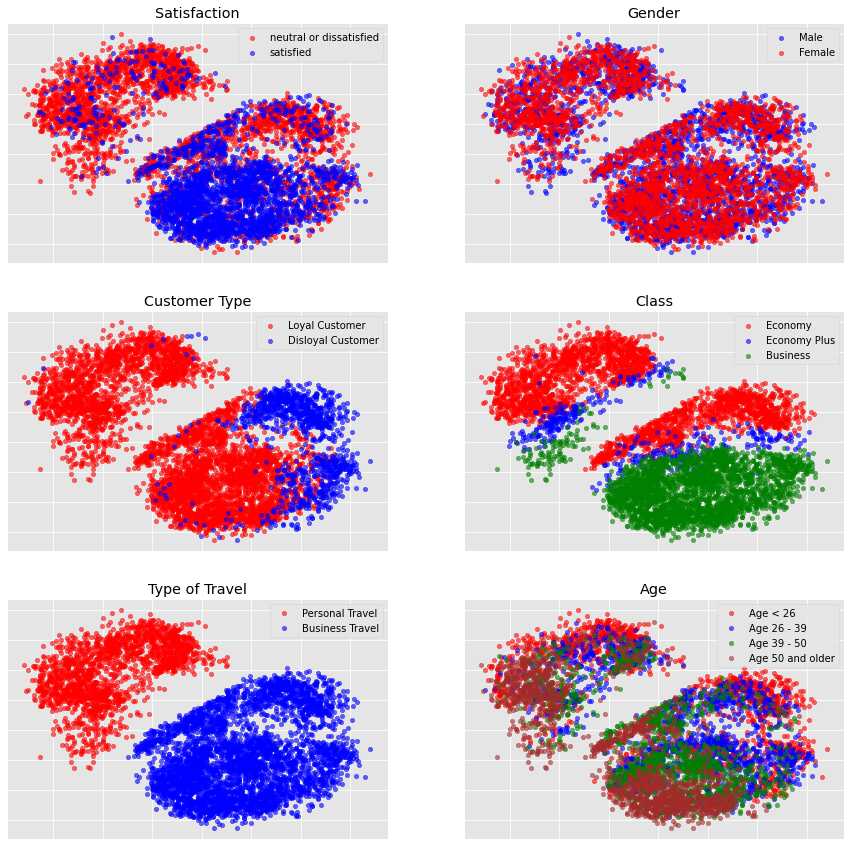

In [28]:
fig = plt.subplots(figsize=(15,15))

plt.subplot(321)
nx.draw_networkx_nodes(G,pos,nodelist=dissatisfied,node_size=20,node_color='r', alpha=0.6,label='neutral or dissatisfied')
nx.draw_networkx_nodes(G,pos,nodelist=satisfied,node_size=20,node_color='b', alpha=0.6,label='satisfied')
plt.title('Satisfaction')
plt.legend()

plt.subplot(322)
nx.draw_networkx_nodes(G,pos,nodelist=male,node_size=20,node_color='b', alpha=0.6,label='Male')
nx.draw_networkx_nodes(G,pos,nodelist=female,node_size=20,node_color='r', alpha=0.6,label='Female')
plt.title('Gender')
plt.legend()

plt.subplot(323)
nx.draw_networkx_nodes(G,pos,nodelist=loyal,node_size=20,node_color='r', alpha=0.6,label='Loyal Customer')
nx.draw_networkx_nodes(G,pos,nodelist=disloyal,node_size=20,node_color='b', alpha=0.6,label='Disloyal Customer')
plt.title('Customer Type')
plt.legend()

plt.subplot(324)
nx.draw_networkx_nodes(G,pos,nodelist=eco,node_size=20,node_color='r', alpha=0.6,label='Economy')
nx.draw_networkx_nodes(G,pos,nodelist=eco_plus,node_size=20,node_color='b', alpha=0.6,label='Economy Plus')
nx.draw_networkx_nodes(G,pos,nodelist=bus,node_size=20,node_color='g', alpha=0.6,label='Business')
plt.title('Class')
plt.legend()

plt.subplot(325)
nx.draw_networkx_nodes(G,pos,nodelist=personal,node_size=20,node_color='r', alpha=0.6,label='Personal Travel')
nx.draw_networkx_nodes(G,pos,nodelist=business,node_size=20,node_color='b', alpha=0.6,label = 'Business Travel')
plt.title('Type of Travel')
plt.legend()

plt.subplot(326)
nx.draw_networkx_nodes(G,pos,nodelist=age0,node_size=20,node_color='r', alpha=0.6,label = 'Age < 26')
nx.draw_networkx_nodes(G,pos,nodelist=age1,node_size=20,node_color='b', alpha=0.6,label = 'Age 26 - 39')
nx.draw_networkx_nodes(G,pos,nodelist=age2,node_size=20,node_color='g', alpha=0.6,label = 'Age 39 - 50')
nx.draw_networkx_nodes(G,pos,nodelist=age3,node_size=20,node_color='brown', alpha=0.6,label = 'Age 50 and older')
plt.title('Age')
plt.legend()

plt.show()


In [29]:
# node2vec
t = pd.read_csv('embeddings', delimiter = " ", index_col=0, header = None)
t.sort_index(inplace=True)
t = t.to_numpy()
t.shape

(6000, 2)

In [30]:
Z = pd.DataFrame(t,columns = ['x1','x2'])
Z['features'] = features

In [31]:
import statsmodels.api as sm
P = sm.add_constant(t) 
log_reg = sm.Logit(features, P).fit()

Optimization terminated successfully.
         Current function value: 0.517356
         Iterations 6


In [32]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:           satisfaction   No. Observations:                 6000
Model:                          Logit   Df Residuals:                     5997
Method:                           MLE   Df Model:                            2
Date:                Mon, 07 Jun 2021   Pseudo R-squ.:                  0.2427
Time:                        14:11:44   Log-Likelihood:                -3104.1
converged:                       True   LL-Null:                       -4099.0
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7051      0.366    -10.135      0.000      -4.422      -2.989
x1             0.9593      0.026     36.244      0.000       0.907       1.011
x2            -3.2333      0.360     -8.992      0.0

In [33]:
predictions = log_reg.predict(P) 

yhat_log = np.empty((len(predictions),1))

for i in range(len(predictions)):
    if predictions[i] < 0.5:
        yhat_log[i] = 0
    else:         
        yhat_log[i] = 1

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix
print('Classification Accuracy validation set {}'.format(accuracy_score(features,yhat_log)))
print('-------------------------------------------------------------')
print('Confusion Matrix validation set:')
print(confusion_matrix(features,yhat_log))

Classification Accuracy validation set 0.7668333333333334
-------------------------------------------------------------
Confusion Matrix validation set:
[[2612  811]
 [ 588 1989]]


In [165]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(x_train, y_train)
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))

0.7685416666666667
0.7583333333333333


/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [35]:
from sklearn.model_selection import train_test_split
f = pd.get_dummies(features)
#f = pd.get_dummies(X.Class)
x_train, x_test, y_train, y_test = train_test_split(t,f, test_size = 0.2, shuffle=True)

In [36]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
x_train_tf = tf.convert_to_tensor(x_train)
x_test_tf = tf.convert_to_tensor(x_test)
y_train_tf = tf.convert_to_tensor(y_train)
y_test_tf = tf.convert_to_tensor(y_test)

model = Sequential()

model.add(Dense(15, activation='relu'))
#model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))
#opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train_tf, y_train_tf,validation_data=(x_test_tf,y_test_tf), epochs=50, batch_size=10)

Epoch 1/50
480/480 [==============================] - 6s 10ms/step - loss: 0.7041 - accuracy: 0.5757 - val_loss: 0.5346 - val_accuracy: 0.7658
Epoch 2/50
480/480 [==============================] - 1s 2ms/step - loss: 0.5267 - accuracy: 0.7633 - val_loss: 0.5226 - val_accuracy: 0.7667
Epoch 3/50
480/480 [==============================] - 1s 2ms/step - loss: 0.5005 - accuracy: 0.7703 - val_loss: 0.5218 - val_accuracy: 0.7658
Epoch 4/50
480/480 [==============================] - 1s 2ms/step - loss: 0.5215 - accuracy: 0.7612 - val_loss: 0.5216 - val_accuracy: 0.7658
Epoch 5/50
480/480 [==============================] - 1s 2ms/step - loss: 0.5142 - accuracy: 0.7660 - val_loss: 0.5206 - val_accuracy: 0.7667
Epoch 6/50
480/480 [==============================] - 1s 2ms/step - loss: 0.5029 - accuracy: 0.7759 - val_loss: 0.5215 - val_accuracy: 0.7658
Epoch 7/50
480/480 [==============================] - 1s 2ms/step - loss: 0.5261 - accuracy: 0.7553 - val_loss: 0.5220 - val_accuracy: 0.7650
Epoch

In [164]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

svm_y = np.empty((len(features),1))

for i in range(len(features)):
    if features.iloc[i] == 1:
        svm_y[i] = 1
    else:
        svm_y[i] = -1

svm_y.astype(int)
x_train, x_test, y_train, y_test = train_test_split(t,svm_y, test_size = 0.2, shuffle=True)


clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train)
print(clf.score(x_train,y_train))
print(clf.score(x_test,y_test))

/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.7695833333333333
0.7566666666666667


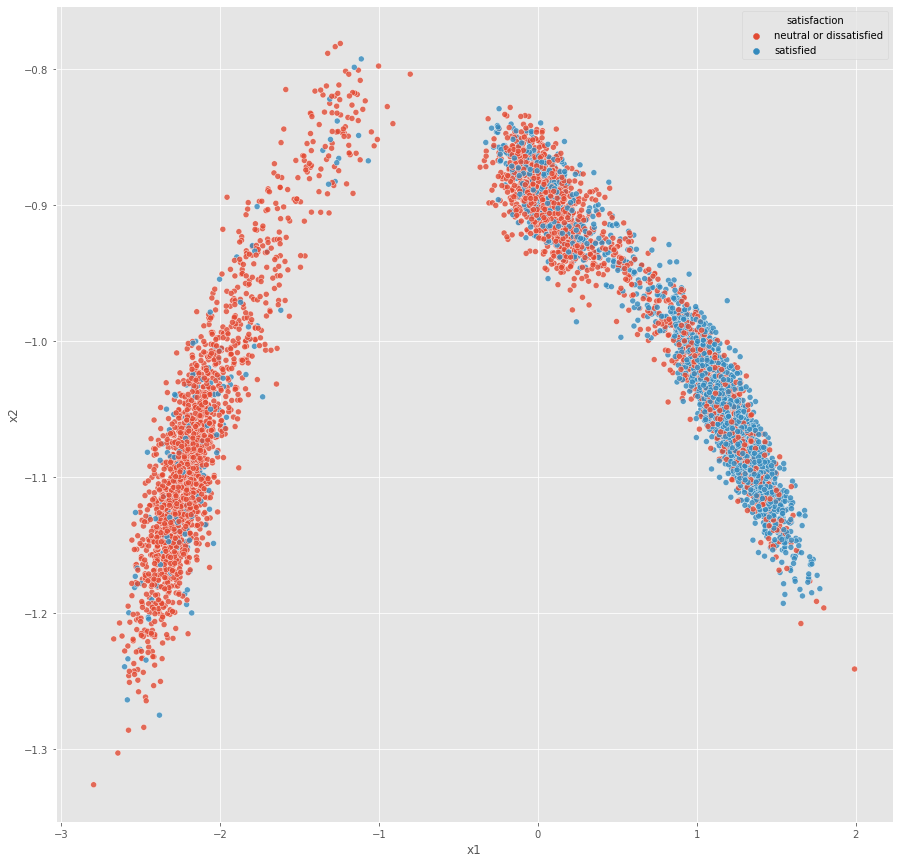

In [37]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.scatterplot(x=Z.x1,y=Z.x2,hue=df['satisfaction'],alpha=0.8)
plt.show()

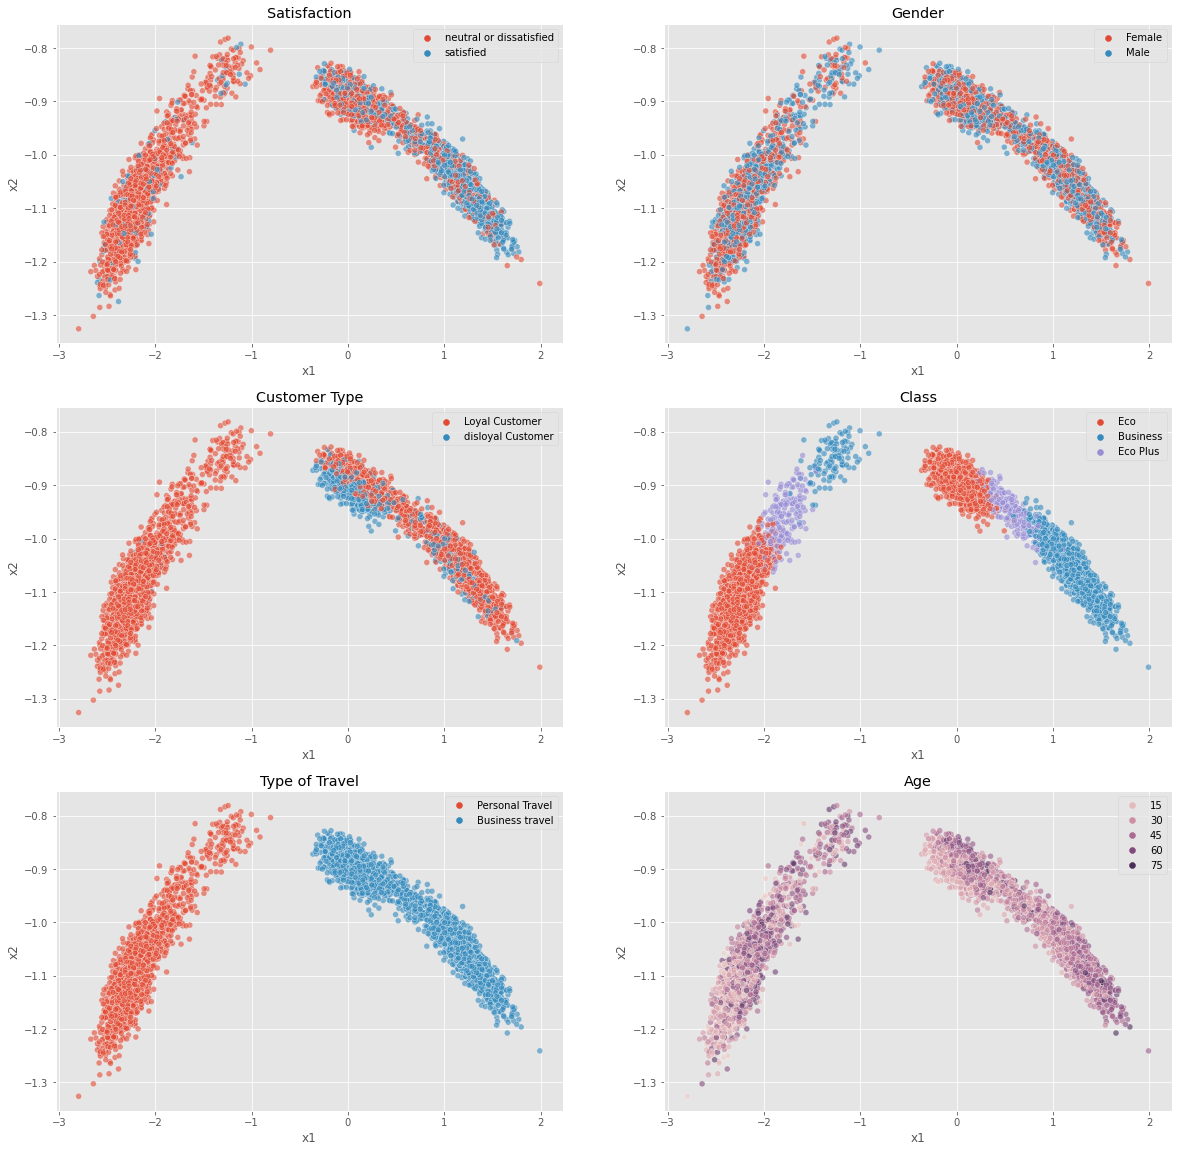

In [162]:
fig = plt.subplots(figsize=(20,20))

plt.subplot(321)
sns.scatterplot(x=Z.x1,y=Z.x2,hue=df['satisfaction'],alpha=0.6)
plt.title('Satisfaction')
plt.legend()

plt.subplot(322)
sns.scatterplot(x=Z.x1,y=Z.x2,hue=df['Gender'],alpha=0.6)
plt.title('Gender')
plt.legend()

plt.subplot(323)
sns.scatterplot(x=Z.x1,y=Z.x2,hue=df['Customer Type'],alpha=0.6)
plt.title('Customer Type')
plt.legend()

plt.subplot(324)
sns.scatterplot(x=Z.x1,y=Z.x2,hue=df['Class'],alpha=0.6)
plt.title('Class')
plt.legend()

plt.subplot(325)
sns.scatterplot(x=Z.x1,y=Z.x2,hue=df['Type of Travel'],alpha=0.6)
plt.title('Type of Travel')
plt.legend()

plt.subplot(326)
sns.scatterplot(x=Z.x1,y=Z.x2,hue=df['Age'],alpha=0.6)
plt.title('Age')
plt.legend()

plt.show()


In [137]:
import dgl
import dgl.nn as dglnn
import torch
import torch.nn as nn
import torch.nn.functional as F
import sklearn.metrics
from sklearn.preprocessing import StandardScaler

G_dgl = dgl.from_networkx(G)
feat = X.drop(columns=['satisfaction'])
#feat = pd.get_dummies(feat)
scale = StandardScaler()
feat = pd.DataFrame(scale.fit_transform(feat))

embedding = nn.Parameter(torch.tensor(feat.values,dtype=torch.float))

# embed = nn.Embedding(102, 5)  # 34 nodes with embedding dim equal to 5
G_dgl.ndata['feat'] =  embedding
G_dgl.ndata['train_mask'] = torch.zeros(len(G_dgl.nodes()), dtype=torch.bool).bernoulli(0.8)
G_dgl.ndata['label'] = torch.tensor(features)

In [138]:
G_dgl.ndata['val_mask'] = torch.empty(len(G_dgl.nodes()))
for i in range(len(G_dgl.ndata['train_mask'])):
    if G_dgl.ndata['train_mask'][i] == True:
        G_dgl.ndata['val_mask'][i] = False
    else:
        G_dgl.ndata['val_mask'][i] = True

G_dgl.ndata['val_mask'] = G_dgl.ndata['val_mask'].type(torch.bool)

In [139]:
node_features = G_dgl.ndata['feat']
node_labels = G_dgl.ndata['label']
train_mask = G_dgl.ndata['train_mask']
valid_mask = G_dgl.ndata['val_mask']
n_features = node_features.shape[1]
n_labels = int(node_labels.max().item() + 1)

In [140]:
train_nodes = (train_mask == True).nonzero(as_tuple=False)
train_nids = torch.reshape(train_nodes,(-1,))
valid_nodes = (valid_mask == True).nonzero(as_tuple=False)
valid_nids = torch.reshape(valid_nodes,(-1,))

In [141]:
len(train_nids)

4783

In [142]:
len(valid_nids)

1217

In [143]:
batch_size = 50
#sampler = dgl.dataloading.MultiLayerNeighborSampler([4, 4, 4])
sampler = dgl.dataloading.MultiLayerNeighborSampler([5, 10])
#sampler = dgl.dataloading.MultiLayerNeighborSampler([None])
train_dataloader = dgl.dataloading.NodeDataLoader(
    G_dgl, train_nids, sampler,
    batch_size=batch_size,
    shuffle=True,
    drop_last=False,
    num_workers=0
)

In [144]:
example_minibatch = next(iter(train_dataloader))
print(example_minibatch)

[tensor([ 118, 4041, 4752,  ..., 5428,  613, 5245]), tensor([ 118, 4041, 4752, 2436,  818, 2064, 3326, 2684, 1578,  162, 5454, 2507,
         375,  748, 3461, 4754, 3822, 2672, 1559, 4270, 5453, 2068, 2512, 4057,
        1168, 1552,  357, 4615, 1924, 5524, 2259, 3571, 5731, 3128, 3943,  687,
        3112, 4128, 2553, 1962, 2360, 1317, 4045,  410,  506, 1497, 2850, 3761,
        1516, 4496]), [Block(num_src_nodes=2426, num_dst_nodes=522, num_edges=2610), Block(num_src_nodes=522, num_dst_nodes=50, num_edges=500)]]


In [145]:
input_nodes, output_nodes, bipartites = example_minibatch
print("To compute {} nodes' output we need {} nodes' input features".format(len(output_nodes), len(input_nodes)))

To compute 50 nodes' output we need 2426 nodes' input features


In [146]:
print(bipartites)

[Block(num_src_nodes=2426, num_dst_nodes=522, num_edges=2610), Block(num_src_nodes=522, num_dst_nodes=50, num_edges=500)]


In [147]:
batch_size = len(valid_nids)
valid_dataloader = dgl.dataloading.NodeDataLoader(
    G_dgl, valid_nids, sampler,
    batch_size=batch_size,
    shuffle=False,
    drop_last=False,
    num_workers=0
)

In [148]:
def norm(x):
    return F.normalize(x, p=2, dim=-1)

Norm = norm

In [149]:
class SAGE(nn.Module):
    def __init__(self, in_feats, n_hidden, n_classes, n_layers):
        super().__init__()
        self.n_layers = n_layers
        self.n_hidden = n_hidden
        self.n_classes = n_classes
        self.layers = nn.ModuleList()
        self.layers.append(dglnn.SAGEConv(in_feats, n_hidden, 'mean', bias=True, feat_drop=0.1))
        for i in range(1, n_layers - 1):
            self.layers.append(dglnn.SAGEConv(n_hidden, n_hidden, 'mean', bias=True, feat_drop=0.1))
        self.layers.append(dglnn.SAGEConv(n_hidden, n_classes, 'mean', bias=True, feat_drop=0.1))
        
    def forward(self, bipartites, x):
        for l, (layer, bipartite) in enumerate(zip(self.layers, bipartites)):
            x = layer(bipartite, x)
            if l != self.n_layers - 1:
                x = F.relu(x)
            elif l == self.n_layers - 1:
                x = F.log_softmax(x,dim=1)
        return x

In [155]:
model = SAGE(n_features, 128, n_labels, 2) #n_layers
opt = torch.optim.Adam(model.parameters())

In [156]:
import sklearn.metrics

best_accuracy = 0
best_model_path = 'model.pt'
epoch_losses_train = []
plot_loss_valid = []
train_acc = []
valid_acc = []

for epoch in range(350):
    model.train()
    loss_epoch = 0
    accuracy_epoch = 0
    for step, (input_nodes, output_nodes, bipartites) in enumerate(train_dataloader):
        inputs = node_features[input_nodes]
        labels = node_labels[output_nodes]
        predictions = model(bipartites, inputs)

        loss = F.cross_entropy(predictions, labels)
        loss_epoch += loss.detach().item()
        opt.zero_grad()
        loss.backward()
        opt.step()

        accuracy = sklearn.metrics.accuracy_score(labels.numpy(), predictions.argmax(1).detach().numpy())
        accuracy_epoch += accuracy
    accuracy_epoch /= (step + 1)
    loss_epoch /= (step + 1)
    epoch_losses_train.append(loss_epoch)
    train_acc.append(accuracy_epoch)
    print('Epoch: {}, Training Accuracy: {:.3f}, Training Loss: {:.3f}'.format(epoch, accuracy_epoch, loss_epoch))
        
    model.eval()
    
    predictions = []
    labels = []
    with torch.no_grad():
        for input_nodes, output_nodes, bipartites in valid_dataloader:
            inputs = node_features[input_nodes]
            labels.append(node_labels[output_nodes].numpy())
            predictions.append(model(bipartites, inputs).argmax(1).numpy())
            valid_pred = model(bipartites, inputs)
            valid_labels = node_labels[output_nodes]
            valid_loss = F.cross_entropy(valid_pred, valid_labels)

        predictions = np.concatenate(predictions)
        labels = np.concatenate(labels)
        
        accuracy = sklearn.metrics.accuracy_score(labels, predictions)
        print('Epoch: {}, Validation Accuracy: {:.3f}, Validation Loss: {:.3f}'.format(epoch, accuracy, valid_loss.item()))
        if best_accuracy < accuracy:
            best_accuracy = accuracy
            torch.save(model.state_dict(), best_model_path)
        valid_acc.append(accuracy.item())
        plot_loss_valid.append(valid_loss.item())
    
#torch.save(model.state_dict(), best_model_path)


Epoch: 0, Training Accuracy: 0.807, Training Loss: 0.450
Epoch: 0, Validation Accuracy: 0.873, Validation Loss: 0.326
Epoch: 1, Training Accuracy: 0.870, Training Loss: 0.336
Epoch: 1, Validation Accuracy: 0.889, Validation Loss: 0.278
Epoch: 2, Training Accuracy: 0.887, Training Loss: 0.293
Epoch: 2, Validation Accuracy: 0.901, Validation Loss: 0.256
Epoch: 3, Training Accuracy: 0.896, Training Loss: 0.275
Epoch: 3, Validation Accuracy: 0.912, Validation Loss: 0.237
Epoch: 4, Training Accuracy: 0.901, Training Loss: 0.256
Epoch: 4, Validation Accuracy: 0.907, Validation Loss: 0.234
Epoch: 5, Training Accuracy: 0.906, Training Loss: 0.237
Epoch: 5, Validation Accuracy: 0.917, Validation Loss: 0.213
Epoch: 6, Training Accuracy: 0.908, Training Loss: 0.234
Epoch: 6, Validation Accuracy: 0.924, Validation Loss: 0.199
Epoch: 7, Training Accuracy: 0.911, Training Loss: 0.228
Epoch: 7, Validation Accuracy: 0.919, Validation Loss: 0.203
Epoch: 8, Training Accuracy: 0.919, Training Loss: 0.215

Epoch: 69, Training Accuracy: 0.944, Training Loss: 0.151
Epoch: 69, Validation Accuracy: 0.932, Validation Loss: 0.176
Epoch: 70, Training Accuracy: 0.940, Training Loss: 0.158
Epoch: 70, Validation Accuracy: 0.924, Validation Loss: 0.184
Epoch: 71, Training Accuracy: 0.938, Training Loss: 0.155
Epoch: 71, Validation Accuracy: 0.929, Validation Loss: 0.170
Epoch: 72, Training Accuracy: 0.937, Training Loss: 0.161
Epoch: 72, Validation Accuracy: 0.936, Validation Loss: 0.169
Epoch: 73, Training Accuracy: 0.940, Training Loss: 0.153
Epoch: 73, Validation Accuracy: 0.928, Validation Loss: 0.175
Epoch: 74, Training Accuracy: 0.942, Training Loss: 0.155
Epoch: 74, Validation Accuracy: 0.933, Validation Loss: 0.171
Epoch: 75, Training Accuracy: 0.937, Training Loss: 0.163
Epoch: 75, Validation Accuracy: 0.933, Validation Loss: 0.167
Epoch: 76, Training Accuracy: 0.938, Training Loss: 0.157
Epoch: 76, Validation Accuracy: 0.932, Validation Loss: 0.166
Epoch: 77, Training Accuracy: 0.935, Tra

Epoch: 137, Training Accuracy: 0.953, Training Loss: 0.121
Epoch: 137, Validation Accuracy: 0.941, Validation Loss: 0.164
Epoch: 138, Training Accuracy: 0.950, Training Loss: 0.121
Epoch: 138, Validation Accuracy: 0.944, Validation Loss: 0.155
Epoch: 139, Training Accuracy: 0.947, Training Loss: 0.131
Epoch: 139, Validation Accuracy: 0.940, Validation Loss: 0.155
Epoch: 140, Training Accuracy: 0.952, Training Loss: 0.124
Epoch: 140, Validation Accuracy: 0.942, Validation Loss: 0.157
Epoch: 141, Training Accuracy: 0.953, Training Loss: 0.124
Epoch: 141, Validation Accuracy: 0.944, Validation Loss: 0.159
Epoch: 142, Training Accuracy: 0.954, Training Loss: 0.121
Epoch: 142, Validation Accuracy: 0.946, Validation Loss: 0.156
Epoch: 143, Training Accuracy: 0.950, Training Loss: 0.130
Epoch: 143, Validation Accuracy: 0.940, Validation Loss: 0.154
Epoch: 144, Training Accuracy: 0.950, Training Loss: 0.123
Epoch: 144, Validation Accuracy: 0.943, Validation Loss: 0.150
Epoch: 145, Training Acc

Epoch: 205, Training Accuracy: 0.956, Training Loss: 0.105
Epoch: 205, Validation Accuracy: 0.946, Validation Loss: 0.153
Epoch: 206, Training Accuracy: 0.955, Training Loss: 0.117
Epoch: 206, Validation Accuracy: 0.942, Validation Loss: 0.157
Epoch: 207, Training Accuracy: 0.954, Training Loss: 0.120
Epoch: 207, Validation Accuracy: 0.948, Validation Loss: 0.147
Epoch: 208, Training Accuracy: 0.957, Training Loss: 0.115
Epoch: 208, Validation Accuracy: 0.943, Validation Loss: 0.152
Epoch: 209, Training Accuracy: 0.957, Training Loss: 0.114
Epoch: 209, Validation Accuracy: 0.946, Validation Loss: 0.151
Epoch: 210, Training Accuracy: 0.956, Training Loss: 0.114
Epoch: 210, Validation Accuracy: 0.947, Validation Loss: 0.144
Epoch: 211, Training Accuracy: 0.955, Training Loss: 0.119
Epoch: 211, Validation Accuracy: 0.942, Validation Loss: 0.153
Epoch: 212, Training Accuracy: 0.954, Training Loss: 0.114
Epoch: 212, Validation Accuracy: 0.941, Validation Loss: 0.153
Epoch: 213, Training Acc

Epoch: 273, Training Accuracy: 0.960, Training Loss: 0.099
Epoch: 273, Validation Accuracy: 0.943, Validation Loss: 0.148
Epoch: 274, Training Accuracy: 0.958, Training Loss: 0.102
Epoch: 274, Validation Accuracy: 0.945, Validation Loss: 0.158
Epoch: 275, Training Accuracy: 0.959, Training Loss: 0.104
Epoch: 275, Validation Accuracy: 0.942, Validation Loss: 0.150
Epoch: 276, Training Accuracy: 0.959, Training Loss: 0.115
Epoch: 276, Validation Accuracy: 0.936, Validation Loss: 0.152
Epoch: 277, Training Accuracy: 0.960, Training Loss: 0.111
Epoch: 277, Validation Accuracy: 0.943, Validation Loss: 0.152
Epoch: 278, Training Accuracy: 0.957, Training Loss: 0.104
Epoch: 278, Validation Accuracy: 0.943, Validation Loss: 0.152
Epoch: 279, Training Accuracy: 0.959, Training Loss: 0.107
Epoch: 279, Validation Accuracy: 0.946, Validation Loss: 0.149
Epoch: 280, Training Accuracy: 0.960, Training Loss: 0.099
Epoch: 280, Validation Accuracy: 0.944, Validation Loss: 0.147
Epoch: 281, Training Acc

Epoch: 341, Training Accuracy: 0.962, Training Loss: 0.100
Epoch: 341, Validation Accuracy: 0.946, Validation Loss: 0.150
Epoch: 342, Training Accuracy: 0.966, Training Loss: 0.094
Epoch: 342, Validation Accuracy: 0.943, Validation Loss: 0.149
Epoch: 343, Training Accuracy: 0.964, Training Loss: 0.098
Epoch: 343, Validation Accuracy: 0.946, Validation Loss: 0.146
Epoch: 344, Training Accuracy: 0.967, Training Loss: 0.093
Epoch: 344, Validation Accuracy: 0.942, Validation Loss: 0.151
Epoch: 345, Training Accuracy: 0.964, Training Loss: 0.093
Epoch: 345, Validation Accuracy: 0.941, Validation Loss: 0.153
Epoch: 346, Training Accuracy: 0.964, Training Loss: 0.094
Epoch: 346, Validation Accuracy: 0.946, Validation Loss: 0.145
Epoch: 347, Training Accuracy: 0.964, Training Loss: 0.091
Epoch: 347, Validation Accuracy: 0.944, Validation Loss: 0.157
Epoch: 348, Training Accuracy: 0.964, Training Loss: 0.092
Epoch: 348, Validation Accuracy: 0.947, Validation Loss: 0.156
Epoch: 349, Training Acc

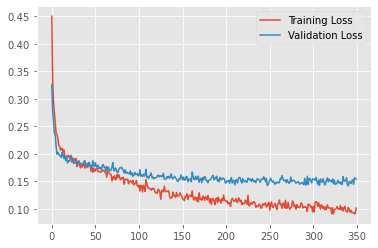

In [157]:
plt.plot(epoch_losses_train, label='Training Loss')
plt.plot(plot_loss_valid, label='Validation Loss')
plt.legend()
plt.show()

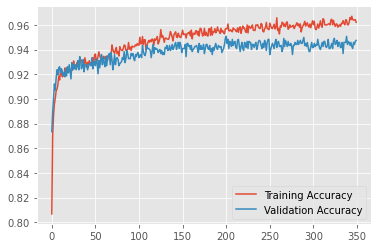

In [158]:
plt.plot(train_acc, label='Training Accuracy')
plt.plot(valid_acc, label='Validation Accuracy')
plt.legend()
plt.show()

In [159]:
print('Training Accuracy: {}'.format(train_acc[np.argmax(valid_acc)]))
print('Validation Accuracy: {}'.format(best_accuracy))

Training Accuracy: 0.9568686868686861
Validation Accuracy: 0.9506984387838948


In [56]:
df_test = pd.read_csv('test.csv',sep=',')
df_test = df_test.sample(n=6000)
df_test.drop(columns=['Unnamed: 0','id'],inplace=True)
df_test.Gender = df_test.Gender.apply(lambda x: 0 if x == 'Male' else 1)
df_test['Customer Type'] = df_test['Customer Type'].apply(lambda x: 0 if x == 'Loyal Customer' else 1)
df_test['Type of Travel'] = df_test['Type of Travel'].apply(lambda x: 0 if x == 'Personal Travel' else 1)
df_test['Class'] = df_test['Class'].apply(lambda x: 0 if x == 'Eco' else(1 if x == 'Eco Plus' else 2))
df_test['satisfaction'] = df_test['satisfaction'].apply(lambda x: 0 if x == 'neutral or dissatisfied' else 1)
df_test.reset_index(drop=True,inplace=True)
df_test.drop(columns=['Arrival Delay in Minutes'],inplace = True)

In [57]:
TEST = df_test.copy(deep=True)

In [58]:
test_gen = TEST[['Gender','Customer Type','Age','Type of Travel','Class']].copy(deep=True)
test_gen.Age = test_gen.Age.apply(lambda x: 0 if x < 26 else(1 if x < 39 else(2 if x < 50 else 3)))

In [59]:
# gender
gend_alpha0 = 0.60
gend_beta1 = 0.40

aff_gend = np.array([[gend_alpha0,gend_beta1],
                     [gend_beta1,gend_alpha0]])

# customer type (loyal vs disoyal)

type_alpha0 = 0.8
type_beta1 = 0.5

aff_type = np.array([[type_alpha0, type_beta1],
                     [type_beta1, type_alpha0]])


# age
age_alpha0 = 0.90
age_beta1 = 0.80
age_beta2 = 0.60
age_beta3 = 0.40

aff_age = np.array([[age_alpha0,age_beta1,age_beta2,age_beta3],
                    [age_beta1,age_alpha0,age_beta1,age_beta2],
                    [age_beta2,age_beta1,age_alpha0,age_beta1],
                    [age_beta3,age_beta2,age_beta1,age_alpha0]])


# Type of travel
trav_type_alpha0 = 0.80
trav_type_beta1 = 0.20

aff_trav_type = np.array([[trav_type_alpha0, trav_type_beta1],
                          [trav_type_beta1, trav_type_alpha0]])

# Class

class_alpha0 = 0.85
class_beta1 = 0.60
class_beta2 = 0.40

aff_class = np.array([[class_alpha0, class_beta1, class_beta2],
                      [class_beta1, class_alpha0, class_beta1],
                      [class_beta2, class_beta1, class_alpha0]])


aff = {0:aff_gend, 1:aff_type, 2:aff_age, 3:aff_trav_type, 4:aff_class}


In [60]:
x = test_gen.to_numpy()
x = x.astype(int)
x = x.T

P_u_v = np.empty((len(x.T),len(x.T)))
prob_u_v = np.empty((len(x),1))
u = np.empty((len(x),1))
v = np.empty((len(x),1))

# create probability for connection between u and v
for i in range(len(x.T)):
    u = x[:,i]

    for k in range(len(x.T)):
        v = x[:,k]

        for j in range(len(x)):
            aff_current = aff[j]
            prob_u_v[j] = aff_current[u[j],v[j]]

        P_u_v[i,k] = np.prod(prob_u_v)

In [61]:
A = np.triu(P_u_v,1)

for i in range(len(P_u_v)):
    for j in range(len(P_u_v)):
        if A[i,j] > np.random.rand():
            A[i,j] = 1
        else:
            A[i,j] = 0

In [62]:
A = A + A.T

In [63]:
G_test = nx.from_numpy_matrix(A)

In [64]:
test_features = pd.Series(TEST.satisfaction)

In [104]:
G_dgl_test = dgl.from_networkx(G_test)
feat_test = TEST.drop(columns=['satisfaction'])
feat_test = pd.get_dummies(feat_test)
scale = StandardScaler()
feat_test = pd.DataFrame(scale.fit_transform(feat_test))

embedding_test = nn.Parameter(torch.tensor(feat_test.values,dtype=torch.float))

# embed = nn.Embedding(102, 5)  # 34 nodes with embedding dim equal to 5
G_dgl_test.ndata['feat'] =  embedding_test
#G_dgl.ndata['train_mask'] = torch.zeros(len(G_dgl.nodes()), dtype=torch.bool).bernoulli(0.2)
G_dgl_test.ndata['label'] = torch.tensor(test_features)

In [105]:
node_features = G_dgl_test.ndata['feat']
node_labels = G_dgl_test.ndata['label']
test_nids = G_dgl_test.nodes()
n_features = node_features.shape[1]
n_labels = int(node_labels.max().item() + 1)

In [106]:
import tqdm

def inference(model, graph, input_features, batch_size):
    nodes = torch.arange(graph.number_of_nodes())
    
    sampler = dgl.dataloading.MultiLayerNeighborSampler([None])  # one layer at a time, taking all neighbors
    dataloader = dgl.dataloading.NodeDataLoader(
        graph, nodes, sampler,
        batch_size=batch_size,
        shuffle=False,
        drop_last=False,
        num_workers=0)
    
    with torch.no_grad():
        for l, layer in enumerate(model.layers):
            # Allocate a buffer of output representations for every node
            # Note that the buffer is on CPU memory.
            output_features = torch.zeros(
                graph.number_of_nodes(), model.n_hidden if l != model.n_layers - 1 else model.n_classes)

            for input_nodes, output_nodes, bipartites in tqdm.tqdm(dataloader):
                bipartite = bipartites[0]

                x = input_features[input_nodes]

                # the following code is identical to the loop body in model.forward()
                x = layer(bipartite, x)
                if l != model.n_layers - 1:
                    x = F.relu(x)
                    
                elif l == model.n_layers - 1:
                    x = F.log_softmax(x,dim=1)

                output_features[output_nodes] = x
            input_features = output_features
    return output_features

In [107]:
model.load_state_dict(torch.load('model.pt'))
all_predictions = inference(model, G_dgl_test, node_features, 6000)

100%|██████████| 1/1 [00:03<00:00,  3.16s/it]


In [108]:
test_predictions = all_predictions[test_nids].argmax(1)
test_labels = node_labels[test_nids]
test_accuracy = sklearn.metrics.accuracy_score(test_predictions.numpy(), test_labels.numpy())
print('Test accuracy:', test_accuracy)

Test accuracy: 0.7596666666666667


In [109]:
from sklearn.metrics import accuracy_score, confusion_matrix

print('Classification Accuracy test set {}'.format(accuracy_score(test_labels.numpy(),test_predictions.numpy())))
print('-------------------------------------------------------------')
print('Confusion Matrix test set:')
print(confusion_matrix(test_labels.numpy(),test_predictions.numpy()))

Classification Accuracy test set 0.7596666666666667
-------------------------------------------------------------
Confusion Matrix test set:
[[3312    2]
 [1440 1246]]


In [71]:
xx = TEST.drop(columns=['satisfaction'])
scale = StandardScaler()
xx = pd.DataFrame(scale.fit_transform(xx))
yy = TEST.satisfaction

In [110]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from sklearn.model_selection import train_test_split

f = pd.get_dummies(features)
x_train, x_test, y_train, y_test = train_test_split(feat,f, test_size = 0.2, shuffle=True)

x_train_tf = tf.convert_to_tensor(x_train)
x_test_tf = tf.convert_to_tensor(x_test)
y_train_tf = tf.convert_to_tensor(y_train)
y_test_tf = tf.convert_to_tensor(y_test)

model = Sequential()

model.add(Dense(15, activation='relu'))
#model.add(Dropout(0.1))
#model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))
#model.add(Dropout(0.1))
opt = tf.keras.optimizers.Adam(learning_rate=5e-4)

model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
history = model.fit(x_train_tf, y_train_tf,validation_data=(x_test_tf,y_test_tf), epochs=300, batch_size=10)

Epoch 1/300
480/480 [==============================] - 2s 3ms/step - loss: 0.7862 - accuracy: 0.4627 - val_loss: 0.4934 - val_accuracy: 0.8158
Epoch 2/300
480/480 [==============================] - 1s 2ms/step - loss: 0.4332 - accuracy: 0.8500 - val_loss: 0.3765 - val_accuracy: 0.8525
Epoch 3/300
480/480 [==============================] - 1s 2ms/step - loss: 0.3360 - accuracy: 0.8780 - val_loss: 0.3422 - val_accuracy: 0.8617
Epoch 4/300
480/480 [==============================] - 1s 3ms/step - loss: 0.3087 - accuracy: 0.8898 - val_loss: 0.3201 - val_accuracy: 0.8733
Epoch 5/300
480/480 [==============================] - 1s 3ms/step - loss: 0.2911 - accuracy: 0.8918 - val_loss: 0.3028 - val_accuracy: 0.8825
Epoch 6/300
480/480 [==============================] - 1s 3ms/step - loss: 0.2807 - accuracy: 0.8954 - val_loss: 0.2884 - val_accuracy: 0.8883
Epoch 7/300
480/480 [==============================] - 1s 2ms/step - loss: 0.2518 - accuracy: 0.9051 - val_loss: 0.2749 - val_accuracy: 0.8925

Epoch 58/300
480/480 [==============================] - 2s 4ms/step - loss: 0.1215 - accuracy: 0.9525 - val_loss: 0.1684 - val_accuracy: 0.9275
Epoch 59/300
480/480 [==============================] - 1s 3ms/step - loss: 0.1343 - accuracy: 0.9478 - val_loss: 0.1701 - val_accuracy: 0.9267
Epoch 60/300
480/480 [==============================] - 1s 3ms/step - loss: 0.1350 - accuracy: 0.9418 - val_loss: 0.1674 - val_accuracy: 0.9275
Epoch 61/300
480/480 [==============================] - 1s 3ms/step - loss: 0.1295 - accuracy: 0.9504 - val_loss: 0.1681 - val_accuracy: 0.9225
Epoch 62/300
480/480 [==============================] - 1s 3ms/step - loss: 0.1218 - accuracy: 0.9501 - val_loss: 0.1653 - val_accuracy: 0.9292
Epoch 63/300
480/480 [==============================] - 2s 4ms/step - loss: 0.1287 - accuracy: 0.9470 - val_loss: 0.1665 - val_accuracy: 0.9300
Epoch 64/300
480/480 [==============================] - 1s 2ms/step - loss: 0.1151 - accuracy: 0.9552 - val_loss: 0.1675 - val_accuracy:

Epoch 115/300
480/480 [==============================] - 1s 2ms/step - loss: 0.1200 - accuracy: 0.9531 - val_loss: 0.1642 - val_accuracy: 0.9375
Epoch 116/300
480/480 [==============================] - 1s 2ms/step - loss: 0.1121 - accuracy: 0.9572 - val_loss: 0.1638 - val_accuracy: 0.9333
Epoch 117/300
480/480 [==============================] - 1s 2ms/step - loss: 0.1226 - accuracy: 0.9522 - val_loss: 0.1634 - val_accuracy: 0.9325
Epoch 118/300
480/480 [==============================] - 1s 2ms/step - loss: 0.1119 - accuracy: 0.9556 - val_loss: 0.1629 - val_accuracy: 0.9358
Epoch 119/300
480/480 [==============================] - 1s 2ms/step - loss: 0.1121 - accuracy: 0.9600 - val_loss: 0.1626 - val_accuracy: 0.9333
Epoch 120/300
480/480 [==============================] - 1s 2ms/step - loss: 0.1059 - accuracy: 0.9614 - val_loss: 0.1637 - val_accuracy: 0.9333
Epoch 121/300
480/480 [==============================] - 1s 2ms/step - loss: 0.1131 - accuracy: 0.9562 - val_loss: 0.1617 - val_ac

480/480 [==============================] - 1s 2ms/step - loss: 0.1107 - accuracy: 0.9588 - val_loss: 0.1670 - val_accuracy: 0.9317
Epoch 172/300
480/480 [==============================] - 1s 2ms/step - loss: 0.1012 - accuracy: 0.9600 - val_loss: 0.1669 - val_accuracy: 0.9342
Epoch 173/300
480/480 [==============================] - 1s 2ms/step - loss: 0.1114 - accuracy: 0.9573 - val_loss: 0.1653 - val_accuracy: 0.9375
Epoch 174/300
480/480 [==============================] - 1s 2ms/step - loss: 0.0970 - accuracy: 0.9640 - val_loss: 0.1654 - val_accuracy: 0.9325
Epoch 175/300
480/480 [==============================] - 1s 2ms/step - loss: 0.1096 - accuracy: 0.9550 - val_loss: 0.1656 - val_accuracy: 0.9358
Epoch 176/300
480/480 [==============================] - 1s 2ms/step - loss: 0.1040 - accuracy: 0.9610 - val_loss: 0.1650 - val_accuracy: 0.9350
Epoch 177/300
480/480 [==============================] - 1s 2ms/step - loss: 0.1092 - accuracy: 0.9579 - val_loss: 0.1646 - val_accuracy: 0.9392

480/480 [==============================] - 1s 2ms/step - loss: 0.0995 - accuracy: 0.9628 - val_loss: 0.1705 - val_accuracy: 0.9308
Epoch 228/300
480/480 [==============================] - 1s 2ms/step - loss: 0.0982 - accuracy: 0.9637 - val_loss: 0.1697 - val_accuracy: 0.9292
Epoch 229/300
480/480 [==============================] - 1s 2ms/step - loss: 0.1108 - accuracy: 0.9577 - val_loss: 0.1679 - val_accuracy: 0.9367
Epoch 230/300
480/480 [==============================] - 1s 2ms/step - loss: 0.0994 - accuracy: 0.9637 - val_loss: 0.1694 - val_accuracy: 0.9367
Epoch 231/300
480/480 [==============================] - 1s 2ms/step - loss: 0.1001 - accuracy: 0.9618 - val_loss: 0.1681 - val_accuracy: 0.9392
Epoch 232/300
480/480 [==============================] - 1s 3ms/step - loss: 0.1111 - accuracy: 0.9577 - val_loss: 0.1689 - val_accuracy: 0.9358
Epoch 233/300
480/480 [==============================] - 1s 2ms/step - loss: 0.1034 - accuracy: 0.9599 - val_loss: 0.1669 - val_accuracy: 0.9358

480/480 [==============================] - 1s 2ms/step - loss: 0.1026 - accuracy: 0.9628 - val_loss: 0.1772 - val_accuracy: 0.9217
Epoch 284/300
480/480 [==============================] - 1s 3ms/step - loss: 0.1008 - accuracy: 0.9621 - val_loss: 0.1723 - val_accuracy: 0.9342
Epoch 285/300
480/480 [==============================] - 1s 1ms/step - loss: 0.0964 - accuracy: 0.9637 - val_loss: 0.1712 - val_accuracy: 0.9317
Epoch 286/300
480/480 [==============================] - 1s 1ms/step - loss: 0.0983 - accuracy: 0.9611 - val_loss: 0.1729 - val_accuracy: 0.9325
Epoch 287/300
480/480 [==============================] - 1s 1ms/step - loss: 0.0996 - accuracy: 0.9653 - val_loss: 0.1715 - val_accuracy: 0.9392
Epoch 288/300
480/480 [==============================] - 1s 3ms/step - loss: 0.0982 - accuracy: 0.9657 - val_loss: 0.1735 - val_accuracy: 0.9325
Epoch 289/300
480/480 [==============================] - 1s 2ms/step - loss: 0.0995 - accuracy: 0.9645 - val_loss: 0.1730 - val_accuracy: 0.9358

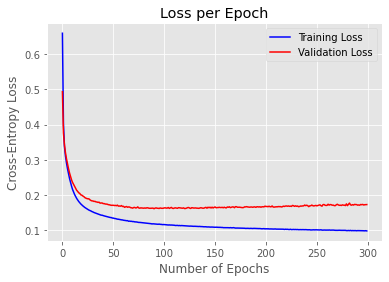

In [111]:
plt.plot(history.history['loss'],label = 'Training Loss', color = 'blue')
plt.plot(history.history['val_loss'],label = 'Validation Loss', color = 'red')
plt.xlabel('Number of Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.title('Loss per Epoch')
plt.legend()
plt.show()

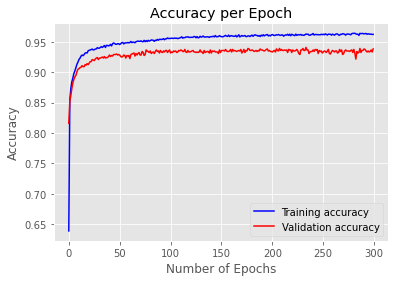

In [112]:
plt.plot(history.history['accuracy'],label = 'Training accuracy', color = 'blue')
plt.plot(history.history['val_accuracy'],label = 'Validation accuracy', color = 'red')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch')
plt.legend()
plt.show()

In [113]:
yy_test = pd.get_dummies(yy)
results = model.evaluate(xx, yy_test, batch_size=128)
print("test loss, test acc:", results)

47/47 [==============================] - 0s 3ms/step - loss: 0.2081 - accuracy: 0.9267
test loss, test acc: [0.20810683071613312, 0.9266666769981384]


In [114]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

feat = X.drop(columns=['satisfaction'])
#feat = pd.get_dummies(feat)
scale = StandardScaler()
feat = pd.DataFrame(scale.fit_transform(feat))

svm_y = np.empty((len(features),1))

for i in range(len(features)):
    if features.iloc[i] == 1:
        svm_y[i] = 1
    else:
        svm_y[i] = -1

svm_y.astype(int)
x_train, x_test, y_train, y_test = train_test_split(feat,svm_y, test_size = 0.2, shuffle=True)


clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train)
pred = clf.predict(x_train)
loss = hinge_loss(y_train,pred)
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))

/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9564583333333333
0.9375


In [115]:
svm_y_test = np.empty((len(yy),1))

for i in range(len(yy)):
    if yy.iloc[i] == 1:
        svm_y_test[i] = 1
    else:
        svm_y_test[i] = -1

svm_y_test.astype(int)

array([[-1],
       [ 1],
       [-1],
       ...,
       [ 1],
       [ 1],
       [-1]])

In [116]:
print(clf.score(xx, svm_y_test))

0.9266666666666666


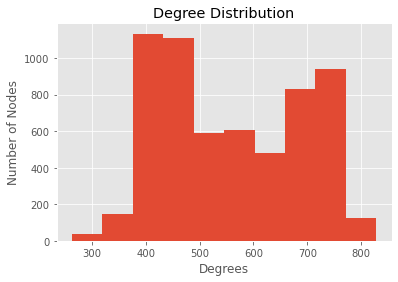

In [79]:
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.title('Degree Distribution')
    plt.xlabel('Degrees')
    plt.ylabel('Number of Nodes')
    plt.show()
    
plot_degree_dist(G)

In [80]:
degrees = [G.degree(n) for n in G.nodes()]
np.mean(degrees)

559.6343333333333

In [117]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=None, random_state=0)

x_train, x_test, y_train, y_test = train_test_split(feat,svm_y, test_size = 0.2, shuffle=True)

clf.fit(x_train, y_train)
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))

<ipython-input-117-5e9f37993a9f>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(x_train, y_train)


1.0
0.9466666666666667


In [118]:
print(clf.score(xx, svm_y_test))

0.9386666666666666


In [119]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(x_train, y_train)
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))
print(clf.score(xx, svm_y_test))

/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9372916666666666
0.9183333333333333
0.9256666666666666


In [120]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(x_train, y_train)
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))
print(clf.score(xx, svm_y_test))

0.8802083333333334
0.8658333333333333
0.8633333333333333


/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [85]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(x_train, y_train)
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))
print(clf.score(xx, svm_y_test))

0.881875
0.8783333333333333
0.8655


/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
